# Correcting header attribute assignment in xapres/load.py
When trying to load some data collected in 2015 by Carlos Martin, I encountered a key error in xa.load.add_attrs. One of the expected header attributes was not present in the dat file. Presumably this is because the data was collected with an older ApRES unit. 

The fix is to loop through the expected attributes and add them to the attributes dict sequentially, catching cases when the expected attribute is not in the header from the dat file. Missing attributes are skipped over.

In [1]:
%load_ext autoreload

%autoreload 2
import sys
sys.path.append(
    "/Users/jkingslake/Documents/science/ApRES/xapres/")
import xapres as xa

In [11]:
root = '/Users/jkingslake/Documents/data/CIR_apres/Data4Jonny'
dats = xa.load.from_dats(loglevel='debug')
files = dats.list_files(root)
ds = dats.load(files[0], computeProfiles=True)

DEBUG    09:56:22 	 load.py @function _setup_logging line 683 - Stream logging level set to DEBUG
DEBUG    09:56:22 	 load.py @function _setup_logging line 684 - Add console handler to logger
DEBUG    09:56:22 	 load.py @function _setup_logging line 696 - File logging level set to DEBUG
DEBUG    09:56:22 	 load.py @function list_files line 143 - Find all the dat files in the directory /Users/jkingslake/Documents/data/CIR_apres/Data4Jonny
DEBUG    09:56:22 	 load.py @function is_this_a_remote_load line 704 - remote_load set to False
DEBUG    09:56:22 	 load.py @function list_files line 161 - Finish call to list_files. Found 24 files
DEBUG    09:56:22 	 load.py @function all_bursts_in_dat_to_xarray line 322 - Attended is False. Generating xarray for unattended data
DEBUG    09:56:22 	 load.py @function all_bursts_in_dat_to_xarray line 323 - bursts_to_process = All at the start of _all_bursts_in_dat_to_xarray.
DEBUG    09:56:22 	 load.py @function subset_bursts_to_process line 486 - burst

In [23]:
ds = dats.load_all(root, computeProfiles=True, attended = False)

DEBUG    10:27:22 	 load.py @function is_this_a_remote_load line 704 - remote_load set to False
DEBUG    10:27:22 	 load.py @function load_all line 224 - Start call to load_all with remote_load = False, directory = /Users/jkingslake/Documents/data/CIR_apres/Data4Jonny, file_numbers_to_process = None, file_names_to_process = None, bursts_to_process = All, attended = False
DEBUG    10:27:22 	 load.py @function list_files line 143 - Find all the dat files in the directory /Users/jkingslake/Documents/data/CIR_apres/Data4Jonny
DEBUG    10:27:22 	 load.py @function is_this_a_remote_load line 704 - remote_load set to False
DEBUG    10:27:22 	 load.py @function list_files line 161 - Finish call to list_files. Found 24 files
DEBUG    10:27:22 	 load.py @function subset_files line 306 - Selecting all dats file because neither file_numbers_to_process nor file_names_to_process were supplied
DEBUG    10:27:22 	 load.py @function load_all line 239 - Attended is False, so starting loop over dat files

In [21]:
ds

<xarray.Dataset> Size: 2GB
Dimensions:          (time: 24, chirp_num: 100, attenuator_setting_pair: 1,
                      chirp_time: 40001, profile_range: 39999)
Coordinates:
  * time             (time) datetime64[ns] 192B 2015-12-13T01:38:38 ... 2015-...
  * chirp_time       (chirp_time) float64 320kB 0.0 2.5e-05 5e-05 ... 1.0 1.0
  * chirp_num        (chirp_num) int64 800B 0 1 2 3 4 5 6 ... 94 95 96 97 98 99
    filename         (time) <U21 2kB '2015-12-13_013721.dat' ... '2015-11-27_...
    folder_name      (time) <U10 960B 'Data4Jonny' 'Data4Jonny' ... 'Data4Jonny'
    burst_number     (time) int64 192B 0 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0 0
    AFGain           (attenuator_setting_pair) int64 8B -14
    attenuator       (attenuator_setting_pair) float64 8B 20.0
    orientation      (time) <U7 672B 'unknown' 'unknown' ... 'unknown' 'unknown'
  * profile_range    (profile_range) float64 320kB 0.0 0.2103 ... 8.411e+03
Dimensions without coordinates: attenuator_setting_pair
Data variables:
    chirp            (time, chirp_num, attenuator_setting_pair, chirp_time) float64 768MB ...
    latitude         (time) float64 192B -83.01 -83.0 -83.01 ... -83.0 -83.01
    longitude        (time) float64 192B -171.9 -173.0 -171.9 ... -173.0 -171.9
    battery_voltage  (time) float64 192B 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    temperature_1    (time) float64 192B 5.375 -11.12 8.711 ... -4.445 -1.695
    temperature_2    (time) float64 192B -1.398 -17.49 3.109 ... -5.523 -3.562
    profile          (time, chirp_num, attenuator_setting_pair, profile_range) complex128 2GB ...
Attributes:
    constants:   {'c': 300000000.0, 'K': 200000000.0, 'f_1': 200000000.0, 'f_...
    processing:  Created on 2025-10-03 10:26:13.536046

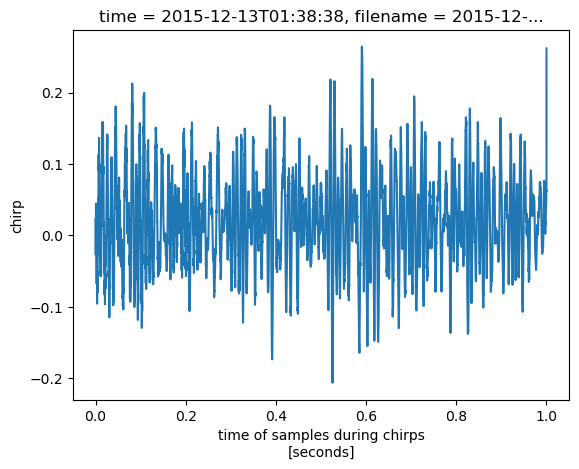

In [35]:
ds.chirp.isel(time=0).mean(dim='chirp_num').plot()

(0.0, 120.0)

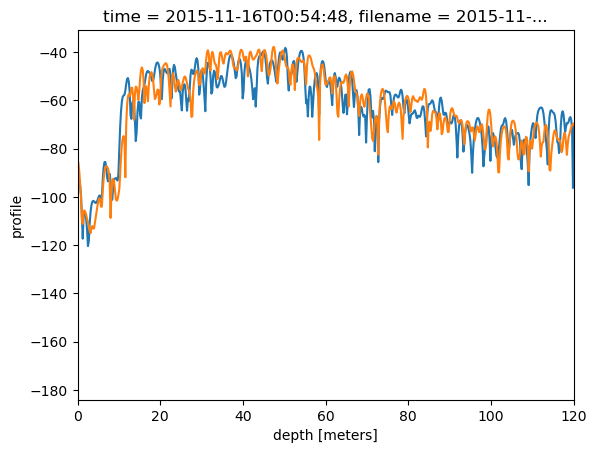

In [47]:
ds.profile.mean(dim='chirp_num').isel(time=0).dB().plot()
ds.profile.mean(dim='chirp_num').isel(time=1).dB().plot()
import matplotlib.pyplot as plt
plt.xlim(0, 120)

In [49]:
ds1 = dats.load(root+'/'+'2015-11-20_005315.dat')

DEBUG    10:39:59 	 load.py @function all_bursts_in_dat_to_xarray line 322 - Attended is False. Generating xarray for unattended data
DEBUG    10:39:59 	 load.py @function all_bursts_in_dat_to_xarray line 323 - bursts_to_process = All at the start of _all_bursts_in_dat_to_xarray.
DEBUG    10:39:59 	 load.py @function subset_bursts_to_process line 486 - bursts_to_process set to "All"
DEBUG    10:39:59 	 load.py @function subset_bursts_to_process line 494 - After the initial parse in _all_bursts_in_dat_to_xarray, bursts_to_process = [0].
DEBUG    10:39:59 	 load.py @function correct_temperature line 649 - Correct temperature values above 300 by adding -512
DEBUG    10:39:59 	 <string> @function add_attrs line 4 - Adding attributes to the xapres.data
DEBUG    10:39:59 	 <string> @function add_attrs line 38 - Could not set dt from header[TStepUp]: 'TStepUp'


In [77]:
ds2 = dats.load(root+'/'+'2015-12-15_021357.dat')


DEBUG    10:53:11 	 load.py @function all_bursts_in_dat_to_xarray line 322 - Attended is False. Generating xarray for unattended data
DEBUG    10:53:11 	 load.py @function all_bursts_in_dat_to_xarray line 323 - bursts_to_process = All at the start of _all_bursts_in_dat_to_xarray.
DEBUG    10:53:11 	 load.py @function subset_bursts_to_process line 486 - bursts_to_process set to "All"
DEBUG    10:53:11 	 load.py @function subset_bursts_to_process line 494 - After the initial parse in _all_bursts_in_dat_to_xarray, bursts_to_process = [0].
DEBUG    10:53:11 	 load.py @function correct_temperature line 649 - Correct temperature values above 300 by adding -512
DEBUG    10:53:11 	 <string> @function add_attrs line 4 - Adding attributes to the xapres.data
DEBUG    10:53:11 	 <string> @function add_attrs line 38 - Could not set dt from header[TStepUp]: 'TStepUp'


In [78]:
ds2

<xarray.Dataset> Size: 97MB
Dimensions:          (time: 1, chirp_num: 100, attenuator_setting_pair: 1,
                      chirp_time: 40001, profile_range: 39999)
Coordinates:
  * time             (time) datetime64[ns] 8B 2015-12-15T02:14:57
  * chirp_time       (chirp_time) float64 320kB 0.0 2.5e-05 5e-05 ... 1.0 1.0
  * chirp_num        (chirp_num) int64 800B 0 1 2 3 4 5 6 ... 94 95 96 97 98 99
    filename         (time) <U21 84B '2015-12-15_021357.dat'
    folder_name      (time) <U10 40B 'Data4Jonny'
    burst_number     (time) int64 8B 0
    AFGain           (attenuator_setting_pair) int64 8B -14
    attenuator       (attenuator_setting_pair) float64 8B 20.0
    orientation      (time) <U7 28B 'unknown'
  * profile_range    (profile_range) float64 320kB 0.0 0.2103 ... 8.411e+03
Dimensions without coordinates: attenuator_setting_pair
Data variables:
    chirp            (time, chirp_num, attenuator_setting_pair, chirp_time) float64 32MB ...
    latitude         (time) float64 8B -82.9
    longitude        (time) float64 8B -172.2
    battery_voltage  (time) float64 8B 0.0
    temperature_1    (time) float64 8B -6.211
    temperature_2    (time) float64 8B 0.7578
    profile          (time, chirp_num, attenuator_setting_pair, profile_range) complex128 64MB ...
Attributes:
    constants:   {'c': 300000000.0, 'K': 200000000.0, 'f_1': 200000000.0, 'f_...
    processing:  Created on 2025-10-03 10:53:11.487230

In [79]:
v = xa.utils.compute_displacement(ds1.profile.mean(dim = 'chirp_num'), ds2.profile.mean(dim = 'chirp_num'))

In [80]:
v

<xarray.Dataset> Size: 2MB
Dimensions:                     (shot_number: 2, time: 1,
                                 attenuator_setting_pair: 1,
                                 profile_range: 39999, bin_depth: 1999)
Coordinates:
    filename                    (shot_number, time) <U21 168B '2015-11-20_005...
    folder_name                 (time) <U10 40B 'Data4Jonny'
    burst_number                (shot_number, time) int64 16B 0 0
    AFGain                      (attenuator_setting_pair) int64 8B -14
    attenuator                  (attenuator_setting_pair) float64 8B 20.0
    orientation                 (time) <U7 28B 'unknown'
  * profile_range               (profile_range) float64 320kB 0.0 ... 8.411e+03
    profile_time                (shot_number, time) datetime64[ns] 16B 2015-1...
  * time                        (time) datetime64[ns] 8B 2015-12-02T13:34:36....
  * shot_number                 (shot_number) int64 16B 1 2
  * bin_depth                   (bin_depth) float64 16kB 1.998 ... 8.405e+03
Dimensions without coordinates: attenuator_setting_pair
Data variables: (12/14)
    profile                     (shot_number, time, attenuator_setting_pair, profile_range) complex128 1MB ...
    coherence                   (time, attenuator_setting_pair, bin_depth) complex128 32kB ...
    phase                       (time, attenuator_setting_pair, bin_depth) float64 16kB ...
    phase_variance              (time, attenuator_setting_pair, bin_depth) float64 16kB ...
    displacement                (time, attenuator_setting_pair, bin_depth) float64 16kB ...
    disp_variance               (time, attenuator_setting_pair, bin_depth) float64 16kB ...
    ...                          ...
    strain_rate                 float64 8B -7.935e-05
    strain_rate_variance        float64 8B 3.207e-09
    surface_intercept           float64 8B -0.7751
    surface_intercept_variance  float64 8B 0.0003283
    r_squared                   float64 8B 0.005831
    sum_squared_residuals       float64 8B 334.8
Attributes:
    bin_size:     20
    description:  Time series of profiles of coherence, phase, displacement, ...
    processing:   Created by the compute_displacement function in xapres usin...

(0.0, 900.0)

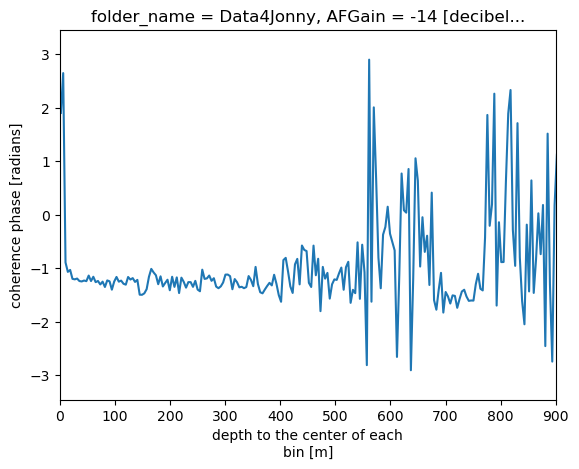

In [87]:
v.phase.plot()
plt.xlim(0, 900)

(100.0, 140.0)

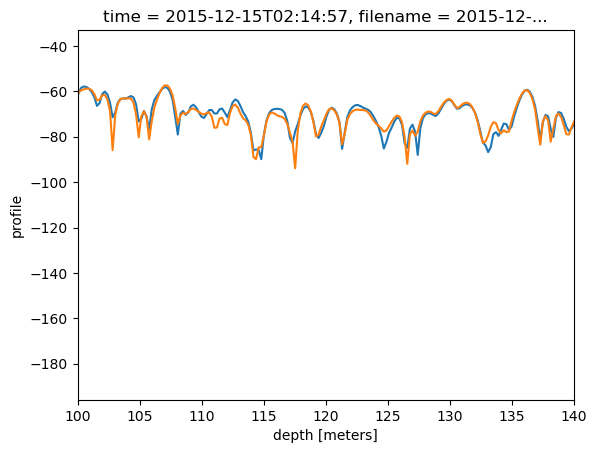

In [84]:
ds1.profile.mean(dim = 'chirp_num').isel(time=0).dB().plot()
ds2.profile.mean(dim = 'chirp_num').isel(time=0).dB().plot()
plt.xlim(100, 140)

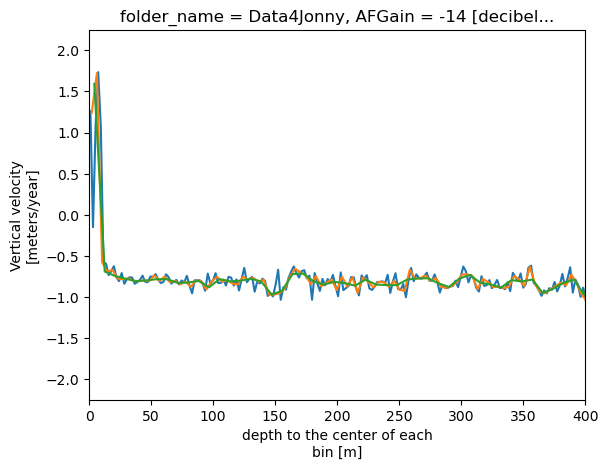

In [96]:
xa.utils.compute_displacement(ds1.profile.mean(dim = 'chirp_num'), ds2.profile.mean(dim = 'chirp_num'), bin_size=10)\
    .velocity.plot(xlim =(00, 400))
xa.utils.compute_displacement(ds1.profile.mean(dim = 'chirp_num'), ds2.profile.mean(dim = 'chirp_num'), bin_size=20)\
    .velocity.plot(xlim =(00, 400))
xa.utils.compute_displacement(ds1.profile.mean(dim = 'chirp_num'), ds2.profile.mean(dim = 'chirp_num'), bin_size=40)\
    .velocity.plot(xlim =(00, 400))
#plt.ylim(-2, 1)